In [1]:
import pandas as pd
import numpy as np
import matplotlib as plt
%matplotlib inline


In [2]:
df = pd.read_csv("loanPrediction.csv")


In [3]:
df.head()


,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [4]:
df.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


In [5]:
df['Property_Area'].value_counts()

Semiurban    233
Urban        202
Rural        179
Name: Property_Area, dtype: int64

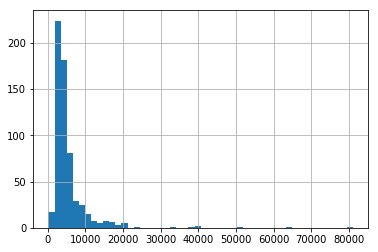

In [6]:
df['ApplicantIncome'].hist(bins = 50)

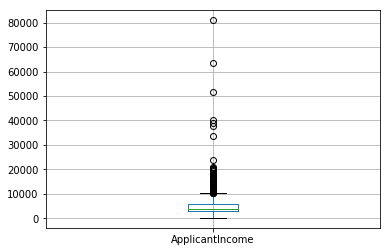

In [7]:
df.boxplot(column="ApplicantIncome")

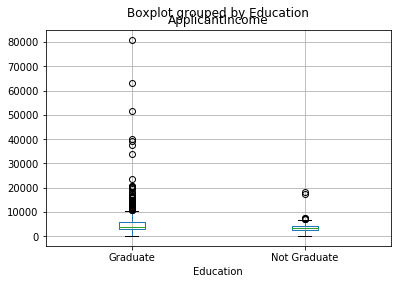

In [8]:
df.boxplot(column='ApplicantIncome',by='Education')

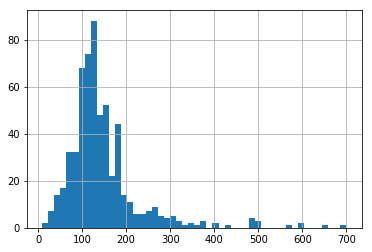

In [9]:
df['LoanAmount'].hist(bins=50)

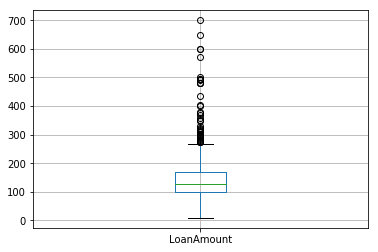

In [10]:
df.boxplot(column='LoanAmount' )

In [11]:
temp1 = df['Credit_History'].value_counts(ascending=True)
temp2 = df.pivot_table(values='Loan_Status',
                       index=['Credit_History'],
                      aggfunc=lambda x:x.map({'Y':1,'N':0}).mean())
print('Frequency table for credit history')
print(temp1)
print('\n Probability of getting loan for each credit his class')
print(temp2)


Frequency table for credit history
0.0     89
1.0    475
Name: Credit_History, dtype: int64

 Probability of getting loan for each credit his class
                Loan_Status
Credit_History             
0.0                0.078652
1.0                0.795789


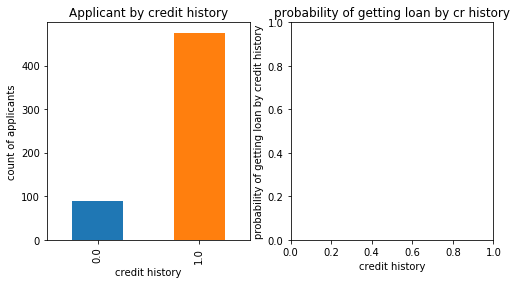

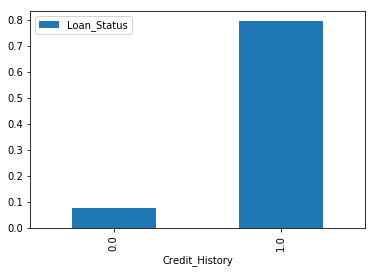

In [12]:
import matplotlib.pyplot as plt 
fig = plt.figure(figsize=(8,4))
ax1 = fig.add_subplot(121)
ax1.set_xlabel('credit history')
ax1.set_ylabel('count of applicants')
ax1.set_title("Applicant by credit history")
temp1.plot(kind = 'bar')

ax2 = fig.add_subplot(122)
ax2.set_xlabel('credit history')
ax2.set_ylabel('probability of getting loan by credit history')
ax2.set_title('probability of getting loan by cr history')
temp2.plot(kind ='bar')

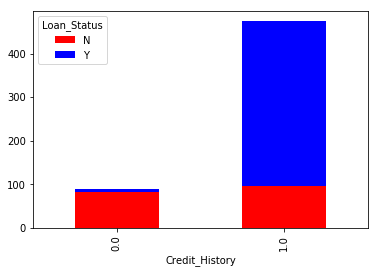

In [13]:
temp3 = pd.crosstab(df['Credit_History'],
                    df['Loan_Status'])
temp3.plot(kind='bar',stacked ='True',
           color=['red','blue'],grid=False)

In [14]:
df.apply(lambda x:sum(x.isnull()),axis=0)

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [15]:
# df['LoanAmount'].fillna(df['LoanAmount'].mean(),inplace=True)

In [16]:
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [17]:
df['Self_Employed'].value_counts()

No     500
Yes     82
Name: Self_Employed, dtype: int64

In [18]:
df['Self_Employed'].fillna('No',inplace=True)

In [19]:
import numpy as np
table = df.pivot_table(values='LoanAmount',
                       index='Self_Employed',
                      columns='Education',
                      aggfunc = np.median)
def fage(x):
    return table.loc[x['Self_Employed'],x['Education']]

df['LoanAmount'].fillna(df[df['LoanAmount'].isnull()]
                        .apply(fage,axis=1),inplace=True)

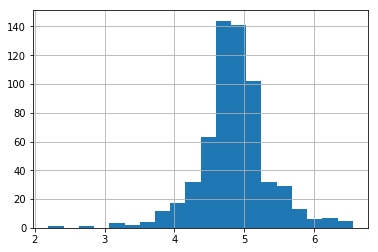

In [20]:
df['LoanAmount_log'] = np.log(df['LoanAmount'])
df['LoanAmount_log'].hist(bins=20)

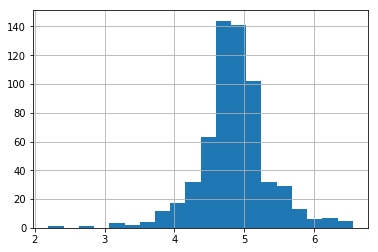

In [21]:
df['TotalIncome'] = df['ApplicantIncome']+df['CoapplicantIncome']
df['TotalIncome_log']=np.log(df['TotalIncome'])
df['LoanAmount_log'].hist(bins=20)

In [22]:
df['Gender'].fillna(df['Gender'].mode()[0],inplace=True)
df['Married'].fillna(df['Married'].mode()[0],inplace=True)
df['Dependents'].fillna(df['Dependents'].mode()[0],inplace=True)
df['Loan_Amount_Term'].fillna(df['Credit_History'].mode()[0],inplace=True)
df['Credit_History'].fillna(df['Credit_History'].mode()[0],inplace=True)


In [23]:
from sklearn.preprocessing import LabelEncoder
var_mod =['Gender','Married','Dependents','Education'
         ,'Self_Employed','Property_Area','Loan_Status']
le = LabelEncoder()

for i in var_mod:
    df[i] = le.fit_transform(df[i])

df.dtypes
# df.head()

Loan_ID               object
Gender                 int64
Married                int64
Dependents             int64
Education              int64
Self_Employed          int64
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area          int64
Loan_Status            int64
LoanAmount_log       float64
TotalIncome          float64
TotalIncome_log      float64
dtype: object

In [24]:
from sklearn.linear_model import LogisticRegression
from sklearn.cross_validation import KFold
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier,export_graphviz
from sklearn import metrics

def classification_model(model,data,predictors,outcome):
    model.fit(data[predictors],data[outcome])
    predictions = model.predict(data[predictors])
    accuracy = metrics.accuracy_score(predictions,data[outcome])
    print("Accuracy:%s" %"{0:.3%}".format(accuracy))
    
    kf = KFold(data.shape[0],n_folds=5)
    error =[]
    for train,test in kf:
        train_predictors = (data[predictors].iloc[train,:])
        train_target = data[outcome].iloc[train]
        model.fit(train_predictors,train_target)
        error.append(model.score(data[predictors].iloc[test,:]
                                ,data[outcome].iloc[test]))
    
    print("cross-validation score:%s"%"{0:.3%}"
             .format(np.mean(error)))
    model.fit(data[predictors],data[outcome])
        
    


/home/rj/anaconda3/lib/python3.6/site-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [25]:
outcome_var = 'Loan_Status'
model = LogisticRegression()
predictor_var =['Credit_History']
classification_model(model,df,predictor_var,outcome_var)


Accuracy:80.945%
cross-validation score:80.946%


In [26]:
predictor_var = ['Credit_History','Education','Married'
                ,'Self_Employed','Property_Area']
classification_model(model,df,predictor_var,outcome_var)

Accuracy:80.945%
cross-validation score:80.946%


# decision tree

In [27]:
model = DecisionTreeClassifier()
predictor_var = ['Credit_History','Gender','Married'
                 ,'Education']
classification_model(model,df,predictor_var,outcome_var)


Accuracy:80.945%
cross-validation score:80.946%


In [28]:
predictor_var = ['Credit_History','Loan_Amount_Term',
                'LoanAmount_log']
classification_model(model,df,predictor_var,outcome_var)


Accuracy:88.925%
cross-validation score:69.212%


# random forest

In [29]:
model = RandomForestClassifier(n_estimators=100)
predictor_var = ['Gender','Married','Dependents',
                 'Education','Self_Employed',
                 'Loan_Amount_Term','Credit_History',
                 'Property_Area','LoanAmount_log',
                 'TotalIncome_log']
classification_model(model,df,predictor_var,outcome_var)

Accuracy:100.000%
cross-validation score:76.552%


In [30]:
featimp = pd.Series(model.feature_importances_, index=predictor_var).sort_values(ascending=False)
print (featimp)

Credit_History      0.272606
TotalIncome_log     0.265432
LoanAmount_log      0.224832
Dependents          0.056272
Property_Area       0.047375
Loan_Amount_Term    0.043200
Married             0.026802
Self_Employed       0.022492
Education           0.020969
Gender              0.020019
dtype: float64


In [31]:
model = RandomForestClassifier(n_estimators=25, min_samples_split=25, max_depth=7, max_features=1)
predictor_var = ['TotalIncome_log','LoanAmount_log','Credit_History','Dependents','Property_Area']
classification_model(model, df,predictor_var,outcome_var)

Accuracy:82.573%
cross-validation score:80.784%
